# Loan characteristic of Borrower APR
## by (Balakrishnan)

## Investigation Overview

> In this presentation, Many visualisation are produced based on loans characteristics to learn the relationship on Borrower's APR. The main characteristic are BorrowerAPR, ProsperScore ,CrediScoreRangeUpper and AvailableBankcardcredit

## Dataset Overview

> This Dataset has 113,917 loans  and each row contain information about borrower APR, amount,debt,status and so on. Variables that contain missing values are removed to make the dataset more accurate in order to do further analysis. Moreover, Outliers were also removed to provide reliable data. This shows the analysing factor that would influence the borrower APR and which loans were taken by what type of borrowers.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
#Expand the large number of columns

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

loan = pd.read_csv('Loan.csv')


In [4]:
#data wrangling
 
#filter out loans without ProsperScore
loan2 = loan[loan['ProsperScore'].isnull()==False]

#remove the columns which is not useful for further analysis
loan.drop(['ListingKey','ListingNumber','ListingCreationDate','CreditGrade','ClosedDate','CurrentlyInGroup','GroupKey','DateCreditPulled','FirstRecordedCreditLine','LoanKey','TotalProsperLoans','TotalProsperPaymentsBilled','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','LoanFirstDefaultedCycleNumber'],axis=1,inplace=True)

#remove few people who has larger creditavailable
HighCredit = loan2[loan2['AvailableBankcardCredit'] > 150000]
loan3 = loan2.drop(HighCredit.index)


## BorrowerAPR Distribution

> Observe the counts for all BorrowerAPR values, the lower APR ia around 0.05% and the higher APR which is around 0.41%. Two larger  counts are found at 0.35797% and 0.35643%

([<matplotlib.axis.XTick at 0x16835588d30>,
 <a list of 10 Text xticklabel objects>)

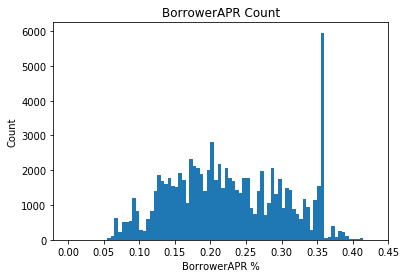

In [5]:
#To Check the count sin Graph
Borrow = np.arange(0,loan2['BorrowerAPR'].max(),0.005)
plt.hist(data = loan2, x='BorrowerAPR',bins=Borrow)
plt.title('BorrowerAPR Count')
plt.xlabel('BorrowerAPR %')
plt.ylabel('Count')
plt.xticks(np.arange(0,loan2['BorrowerAPR'].max()+0.05,0.05))

## BorrowerAPR vs ProsperScore

> A ProsperScore was given to each borrowers. The better rating will be received by borrower if the score is higher. The plot says clearly there is negative correlation between BorrowerAPR and ProsperScore. It clearly says lower the ProsperScore wen the APR is higher. Because borrower with higher rating tend to receive lower interest rate and APR.

Text(0,0.5,'ProsperScore')

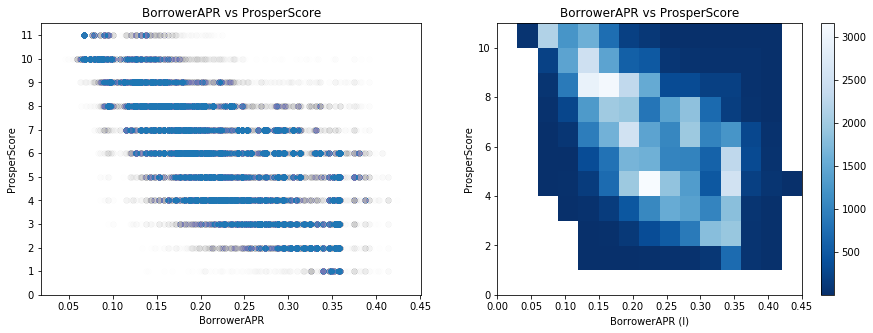

In [6]:
#We need to compare  ProsperScore and BorrowerAPR
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.scatter(data = loan3, x='BorrowerAPR', y='ProsperScore',alpha = 0.005)
plt.yticks(np.arange(0,12,1))
plt.title('BorrowerAPR vs ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')

plt.subplot(1,2,2)
x = np.arange(0,loan3['BorrowerAPR'].max()+0.05, 0.03)
y = np.arange(0,loan3['ProsperScore'].max()+1,1)
plt.hist2d(data= loan3, x='BorrowerAPR',y= 'ProsperScore', bins = [x,y], cmap='Blues_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs ProsperScore')
plt.xlabel("BorrowerAPR (l)")
plt.ylabel('ProsperScore')

## BorroweAPR vs ProseperScore on each ProseperRating
> This visualisation clearly help us to find deep insight about BorrowerAPr vs ProsperScore on different letter rating. It says that the lowest ratings of borrowers have higher APR percentage. On the other hand borrowers who are having higher rating has lower APR percentage. This Visualisation discrete group of people in terms of APR received.



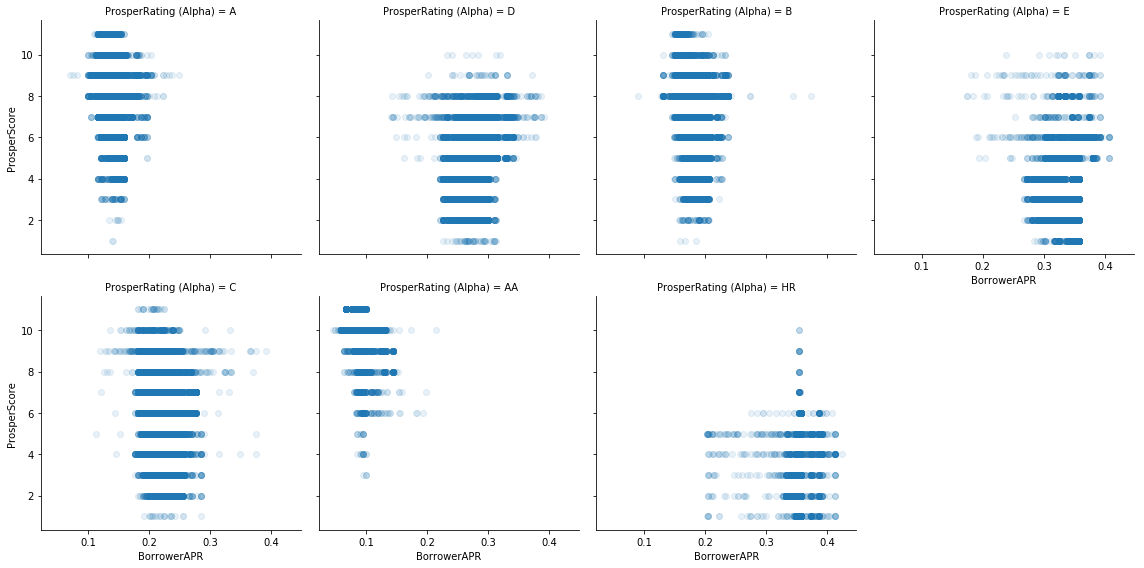

In [7]:
a = sb.FacetGrid(data=loan3,col='ProsperRating (Alpha)', col_wrap = 4 , size = 4)
a.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha=0.1)
a.set_xlabels('BorrowerAPR')
a.set_ylabels('ProsperScore')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <Loan>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!